preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\prana\.cache\huggingface\hub\models--facebook--wav2vec2-base-960h. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed']
You sho

Recognized Phonemes: THE INVENTION OF MOVABLE METAL LETTERS IN THE MIDDLE OF THE FIFTEENTH CENTURY MAY JUSTLY BE CONSIDERED AS THE INVENTION OF THE ART OF PRINTING


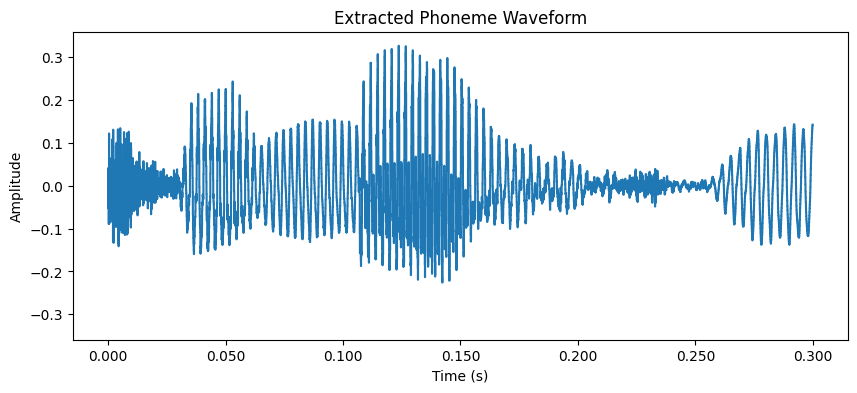

In [1]:
import torchaudio
import torchaudio.transforms as T
import librosa.display
import torch
import numpy as np
import matplotlib.pyplot as plt
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
import librosa

# Step 1: Load Speech Signal
def load_audio(file_path, target_sr=16000):
    waveform, sample_rate = librosa.load(file_path, sr=target_sr, mono=True)
    return waveform, sample_rate

# Step 2: Preprocess Audio
def preprocess_audio(waveform, sample_rate, target_sr=16000):
    if sample_rate != target_sr:
        waveform = librosa.resample(waveform, orig_sr=sample_rate, target_sr=target_sr)
    return waveform

# Step 3: Use Pre-trained Wav2Vec2 for Phoneme Recognition
def recognize_phonemes(waveform, processor, model):
    inputs = processor(waveform, sampling_rate=16000, return_tensors="pt", padding=True)
    with torch.no_grad():
        logits = model(inputs.input_values).logits
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)[0]
    return transcription

# Step 4: Extract a Specific Phoneme Segment
def extract_segment(waveform, sample_rate, start_time, end_time):
    start_sample = int(start_time * sample_rate)
    end_sample = int(end_time * sample_rate)
    return waveform[start_sample:end_sample]

# Step 5: Visualize Phoneme Waveform
def plot_waveform(waveform, sample_rate, title="Waveform"):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

# Load Pre-trained Wav2Vec2 Model
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

# Example Usage
file_path = "C:\\Users\\prana\\Downloads\\LJ001-0005.wav" 
waveform, sample_rate = load_audio(file_path)
waveform = preprocess_audio(waveform, sample_rate)

# Recognize Phonemes
transcription = recognize_phonemes(waveform, processor, model)
print("Recognized Phonemes:", transcription)

# Extract and Visualize a Specific Phoneme
start_time, end_time = 0.5, 0.8  # Example interval
extracted_segment = extract_segment(waveform, sample_rate, start_time, end_time)
plot_waveform(extracted_segment, sample_rate, title="Extracted Phoneme Waveform")


In [ ]:
!pip install torchaudio